# Synthea COVID-19 Module Analysis
This notebook provides and analysis of data generated by Synthea (https://synthetichealth.github.io/synthea/)'s
COVID-19 module. Analysis is run on the CSV output from Synthea

In [ ]:
# importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### loading data

In [ ]:
# reading in and displaying snippets of all the data
conditions = pd.read_csv("Condition.csv")
patients = pd.read_csv("Patient.csv")
observations = pd.read_csv("Observation.csv")
care_plans = pd.read_csv("CarePlan.csv")
encounters = pd.read_csv("Encounter.csv")

In [ ]:
print(conditions.columns)
print(patients.columns)
print(observations.columns)
print(care_plans.columns)
print(encounters.columns)

Index(['Unnamed: 0', 'patientId', 'code', 'encounterId', 'onsetDateTime',
       'resolvedDateTime', 'codeText'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'gender', 'birthDate', 'maritalStatus', 'city',
       'state', 'postalCode', 'country', 'deceased', 'deceasedDateTime'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'patientId', 'issuedDate', 'effectiveDateTime',
       'category', 'encounter', 'code', 'codeText', 'value', 'units',
       'snomedCode', 'observationType'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'status', 'patientId', 'start', 'end', 'category',
       'code', 'codeText', 'intent', 'encounter', 'careTeam', 'activityCode',
       'activityCodeText', 'activityStatus', 'activityLocation'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'status', 'code', 'codeText', 'start', 'end',
       'patientId', 'location', 'serviceProvider', 'encounterClass'],
      dtype='object')


## Data Aggregation
✅ Step 1: COVID Patient Demographics
We’ll extract:

- Total number of COVID patients

- Gender distribution

- Age distribution

- Location stats (city/state/postalCode)

- Mortality rate


In [ ]:
# lets filter for Covid patients only
covid_diagnosis = conditions[conditions.code == 840539006] # filters COVID diagnosis
covid_patient_ids = covid_diagnosis['patientId'].unique() # takes unique values of PatientID
covid_patients = patients[patients.id.isin(covid_patient_ids)] # Filter by patient id in conditions

covid_patients.head()

,Unnamed: 0,id,gender,birthDate,maritalStatus,city,state,postalCode,country,deceased,deceasedDateTime
5,5,4a739e22-20da-8f2e-771b-2a0935be0b06,male,1967-09-08,Married,Marquette,MI,49855,US,False,NaN
11,11,ca3a2ae6-c66e-ec1d-6551-0b0d05d7312f,male,1977-04-01,Married,Marquette,MI,49855,US,False,NaN
15,15,31e87aca-f4fb-afed-29d4-1b20e3707673,female,1944-10-11,Widowed,Baraga,MI,49908,US,False,NaN
17,17,a879646b-13d5-9e7d-d820-12e29eb68137,female,1985-10-04,Married,Houghton,MI,49931,US,False,NaN
31,31,19b03a5a-33c1-ec94-8567-a0d4182bc940,male,2013-02-13,Never Married,Baraga,MI,49908,US,False,NaN


📊 1. Total COVID Patients


In [ ]:
total_covid_patients = covid_patients.shape[0]
print(f"Total number of COVID patients: {total_covid_patients}")

Total number of COVID patients: 128


📊 2. Gender Distribution

gender
male      66
female    62
Name: count, dtype: int64


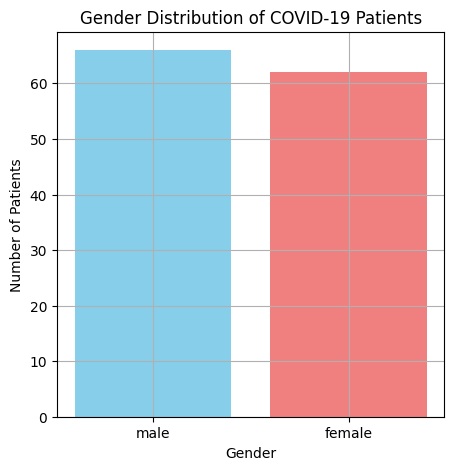

In [ ]:
gender_dist = covid_patients.gender.value_counts()
print(gender_dist)

plt.figure(figsize=(5, 5))
plt.bar(gender_dist.index, gender_dist.values, color=['skyblue', 'lightcoral'])
plt.title('Gender Distribution of COVID-19 Patients')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)  # Prevent x-axis labels from overlapping
plt.grid(True)
plt.show();

📊 3. Age Distribution

age_group
0-18     18
19-35    23
36-60    47
60+      38
Name: count, dtype: int64


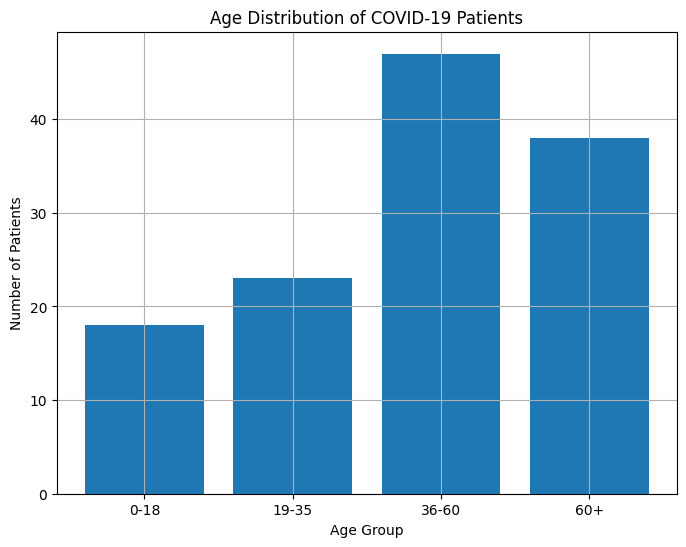

In [ ]:
from datetime import datetime

covid_patients['birthDate'] = pd.to_datetime(covid_patients['birthDate'])
covid_patients['age'] = covid_patients['birthDate'].apply(lambda x: datetime.now().year - x.year)

age_bins = [0, 18, 35, 60, 100]
age_labels = ['0-18', '19-35', '36-60', '60+']
covid_patients['age_group'] = pd.cut(covid_patients['age'], bins=age_bins, labels=age_labels)

age_dist = covid_patients['age_group'].value_counts().sort_index()
print(age_dist)

plt.figure(figsize=(8, 6))
plt.bar(age_dist.index, age_dist.values)
plt.title('Age Distribution of COVID-19 Patients')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)  # Prevent x-axis labels from overlapping
plt.grid(True)
plt.show();


📊 4. Location (Top Cities/States)

Top Cities:
 city
Marquette    103
Baraga        18
Houghton       5
Calumet        2
Name: count, dtype: int64


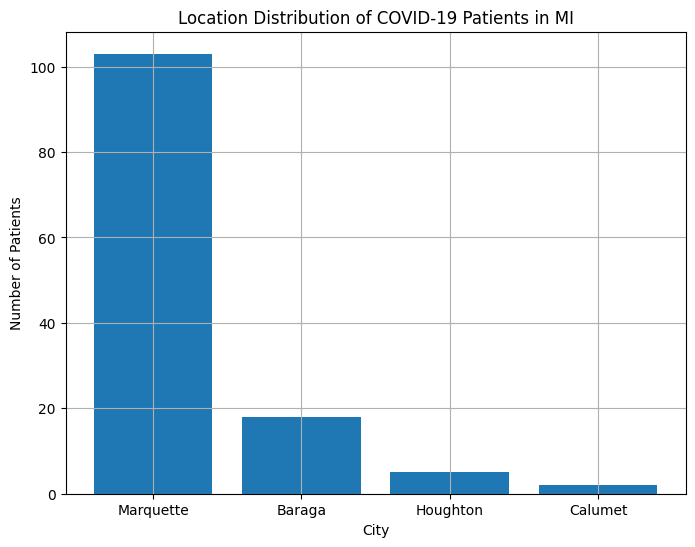

In [ ]:
# lets see the distribution of COVID by
top_cities = covid_patients['city'].value_counts().head(10)
print("Top Cities:\n", top_cities)

plt.figure(figsize=(8, 6))
plt.bar(top_cities.index, top_cities.values)
plt.title('Location Distribution of COVID-19 Patients in MI')
plt.xlabel('City')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)  # Prevent x-axis labels from overlapping
plt.grid(True)
plt.show();

📊 5. Deceased Rate

In [ ]:
covid_patients['deceased'] = covid_patients['deceased'].astype(str).str.lower()
deceased_count = covid_patients['deceased'].value_counts().get('true', 0)
mortality_rate = deceased_count / total_covid_patients * 100

print(f"Deceased COVID Patients: {deceased_count}")
print(f"Mortality Rate: {mortality_rate:.2f}%")


Deceased COVID Patients: 6
Mortality Rate: 4.69%


# Summary of COVID demographics
From the simple analysis and visuals above we can clearly observe that:

1. There were slightly more male Covid patients than females generated by Synthea. In general the data is balanced.

2. In terms of overall age distribution, the data clearly diplays more patients in the 36-60 age bracket. Various factors will be investigated to determine why this is the case.

3. Location wise, Marquette presents more cases, this is the case since more synthea data was obtained for that particular region.

4. In terms of mortality rate, according to the data generated, 6 of the patients died, bringing the mortality rate to 5%.

✅ Step 2: COVID Case Timelines.

This step explores when cases occurred, how long they lasted, and how they resolved.

In [ ]:
covid_diagnosis['onsetDateTime'] = pd.to_datetime(covid_diagnosis['onsetDateTime'], errors='coerce') # coerce tells the datetime
#function to handle errors by replacing them with Nat(not a time)
covid_diagnosis['resolvedDateTime'] = pd.to_datetime(covid_diagnosis['resolvedDateTime'], errors='coerce')


📈 2.1. Number of COVID Cases Over Time (by Month)

onset_month
2020-03     1
2020-04     4
2020-05     1
2020-06     3
2020-07     8
2020-08     6
2020-09     4
2020-10    10
2020-11    21
2020-12    21
2021-01    17
2021-02     8
2021-03     5
2021-04     8
2021-07     3
2021-08     4
2021-09     4
Freq: M, dtype: int64


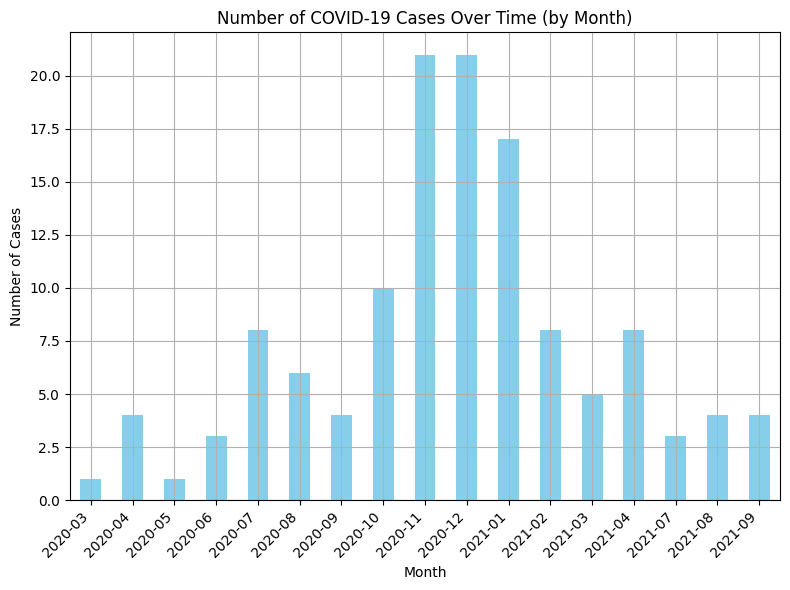

In [ ]:
covid_diagnosis['onset_month'] = covid_diagnosis['onsetDateTime'].dt.to_period('M')
cases_by_month = covid_diagnosis.groupby('onset_month').size()

print(cases_by_month)

# Create the plot
plt.figure(figsize=(8, 6))
cases_by_month.plot(kind='bar', color='skyblue')  # Use bar plot

# Set plot labels and title
plt.title('Number of COVID-19 Cases Over Time (by Month)')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.grid(True)
plt.show()

In [ ]:
resolved_count = covid_diagnosis['resolvedDateTime'].notna().sum()
ongoing_count = covid_diagnosis['resolvedDateTime'].isna().sum()

print("Resolved cases:", resolved_count)
print("Ongoing cases:", ongoing_count)


Resolved cases: 128
Ongoing cases: 0


✅ Step 3: COVID Case Encounters.

We’ll focus on encounters involving COVID patients only.

In [ ]:
#filter by patientID
covid_encounters = encounters[encounters['patientId'].isin(covid_patient_ids)]
covid_encounters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9180 entries, 242 to 141507
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       9180 non-null   int64 
 1   id               9180 non-null   object
 2   status           9180 non-null   object
 3   code             9180 non-null   int64 
 4   codeText         9180 non-null   object
 5   start            9180 non-null   object
 6   end              9180 non-null   object
 7   patientId        9180 non-null   object
 8   location         9180 non-null   object
 9   serviceProvider  9180 non-null   object
 10  encounterClass   9180 non-null   object
dtypes: int64(2), object(9)
memory usage: 860.6+ KB


In [ ]:
# Convert date columns
covid_encounters['start'] = pd.to_datetime(covid_encounters['start'], errors='coerce')
covid_encounters['end'] = pd.to_datetime(covid_encounters['end'], errors='coerce')
covid_encounters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9180 entries, 242 to 141507
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype                    
---  ------           --------------  -----                    
 0   Unnamed: 0       9180 non-null   int64                    
 1   id               9180 non-null   object                   
 2   status           9180 non-null   object                   
 3   code             9180 non-null   int64                    
 4   codeText         9180 non-null   object                   
 5   start            3360 non-null   datetime64[ns, UTC-05:00]
 6   end              3364 non-null   datetime64[ns, UTC-05:00]
 7   patientId        9180 non-null   object                   
 8   location         9180 non-null   object                   
 9   serviceProvider  9180 non-null   object                   
 10  encounterClass   9180 non-null   object                   
dtypes: datetime64[ns, UTC-05:00](2), int64(2), object(7)
memo

📊 3.1. Encounter Type/Status Distribution

Helps understand if patients were mostly seen in inpatient, emergency, or outpatient settings.

Encounter Status:
 status
finished    9180
Name: count, dtype: int64

Encounter Class:
 encounterClass
AMB     8640
EMER     304
IMP      157
HH        70
VR         9
Name: count, dtype: int64


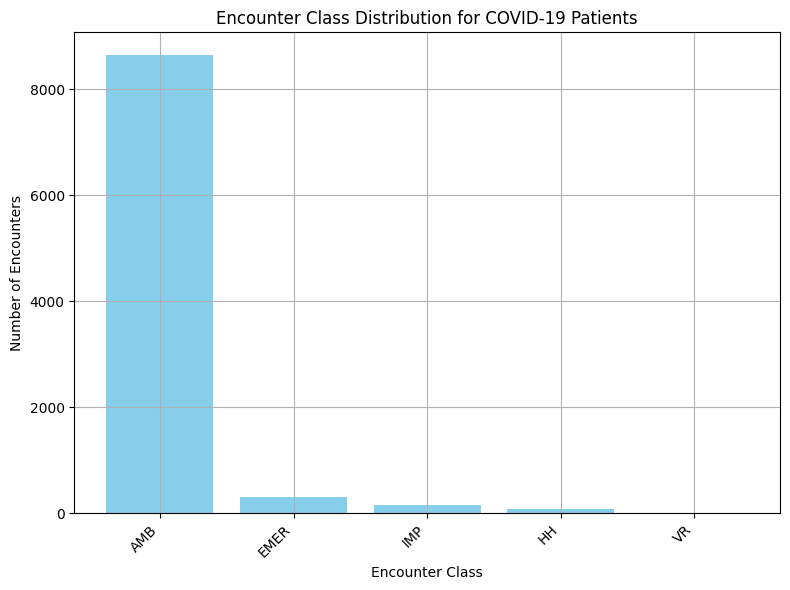

In [ ]:
status_dist = covid_encounters['status'].value_counts()
encounter_class_dist = covid_encounters['encounterClass'].value_counts()


print("Encounter Status:\n", status_dist)
print("\nEncounter Class:\n", encounter_class_dist)


# Create a bar plot for encounter class distribution
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(encounter_class_dist.index, encounter_class_dist.values, color='skyblue')

# Set plot labels and title
plt.title('Encounter Class Distribution for COVID-19 Patients')
plt.xlabel('Encounter Class')
plt.ylabel('Number of Encounters')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.grid(True)
plt.show();

In [ ]:
covid_encounters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9180 entries, 242 to 141507
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype                    
---  ------           --------------  -----                    
 0   Unnamed: 0       9180 non-null   int64                    
 1   id               9180 non-null   object                   
 2   status           9180 non-null   object                   
 3   code             9180 non-null   int64                    
 4   codeText         9180 non-null   object                   
 5   start            3360 non-null   datetime64[ns, UTC-05:00]
 6   end              3364 non-null   datetime64[ns, UTC-05:00]
 7   patientId        9180 non-null   object                   
 8   location         9180 non-null   object                   
 9   serviceProvider  9180 non-null   object                   
 10  encounterClass   9180 non-null   object                   
dtypes: datetime64[ns, UTC-05:00](2), int64(2), object(7)
memo

📅 2. Encounter Frequency Over Time

start_2019
2019    299
2020    359
2021    319
2022    233
2023    214
2024    231
2025    117
Freq: Y-DEC, dtype: int64


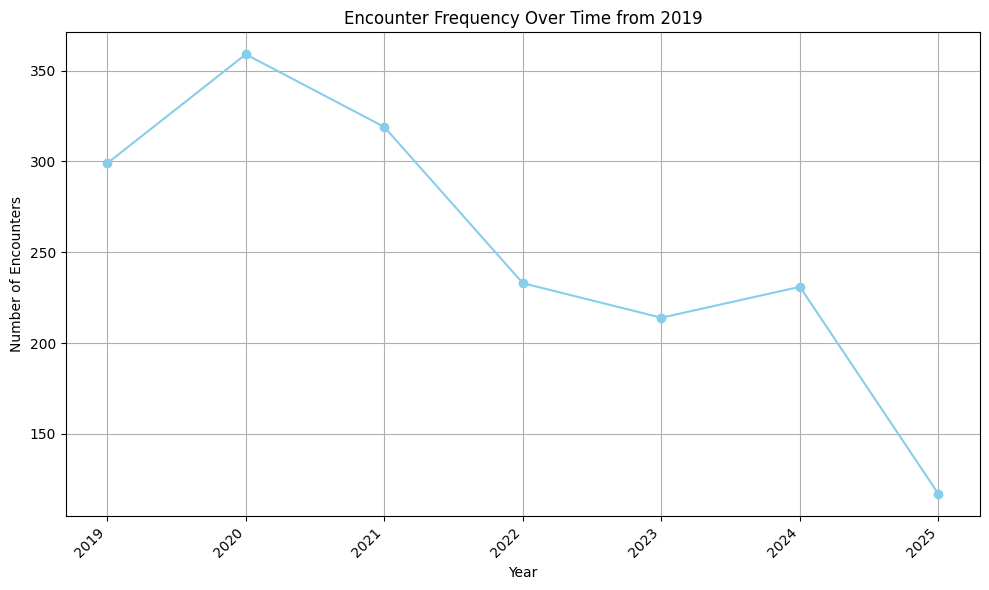

In [ ]:
# Filter encounters from 2019 onwards
filtered_encounters = covid_encounters[covid_encounters['start'].dt.year >= 2019]

# Group by month and count encounters (for the filtered data)
filtered_encounters['start_2019'] = filtered_encounters['start'].dt.to_period('Y')  # Or 'Y' for year
encounters_per_year = filtered_encounters.groupby('start_2019').size()

print(encounters_per_year)


# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(encounters_per_year.index.astype(str), encounters_per_year.values,
         marker='o', linestyle='-', color='skyblue')

# Set plot labels and title
plt.title('Encounter Frequency Over Time from 2019')
plt.xlabel('Year')
plt.ylabel('Number of Encounters')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.grid(True)  # Add a grid for better visualization
plt.show()

Filtering encounters by year helps us focus on the COVID-19 related encounters that occurred from 2019 onwards, which is likely the period when the pandemic started and had a significant impact.

⏳ 3.3. Average Encounter Duration

In [ ]:
filtered_encounters['duration_days'] = (filtered_encounters['end'] - filtered_encounters['start']).dt.days
avg_encounter_duration = filtered_encounters['duration_days'].mean()

print(f"Average encounter duration: {avg_encounter_duration:.2f} days")


Average encounter duration: 0.24 days


In [ ]:
encounter_summary = filtered_encounters[['id', 'patientId', 'status', 'encounterClass', 'start', 'end', 'duration_days']]
encounter_summary.to_csv("COVID_Encounter_Summary.csv", index=False)



✅Step 4: Observations 🧪📋

We'll analyze clinical observations recorded during COVID encounters, such as temperature, oxygen levels, etc.

In [ ]:
# We’ll filter by patientId to get COVID patients only
covid_observations = observations[observations['patientId'].isin(covid_patient_ids)]


In [ ]:
# Convert dates
covid_observations['issuedDate'] = pd.to_datetime(covid_observations['issuedDate'], errors='coerce')
covid_observations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143482 entries, 1864 to 1894238
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype                    
---  ------             --------------   -----                    
 0   Unnamed: 0         143482 non-null  int64                    
 1   id                 143482 non-null  object                   
 2   patientId          143482 non-null  object                   
 3   issuedDate         52752 non-null   datetime64[ns, UTC-05:00]
 4   effectiveDateTime  143482 non-null  object                   
 5   category           143482 non-null  object                   
 6   encounter          143482 non-null  object                   
 7   code               143482 non-null  object                   
 8   codeText           143482 non-null  object                   
 9   value              143482 non-null  object                   
 10  units              90408 non-null   object                   
 11  snomedCode    

📊 4.1. Observation Type Frequency

Gives insight into which vitals/tests were most commonly recorded for COVID patients.

Top 10 Observation Types:
 code
72514-3    3692
8462-4     2654
8480-6     2654
29463-7    2629
8867-4     2600
9279-1     2600
33914-3    2259
8302-2     2153
72166-2    2121
39156-5    2097
Name: count, dtype: int64


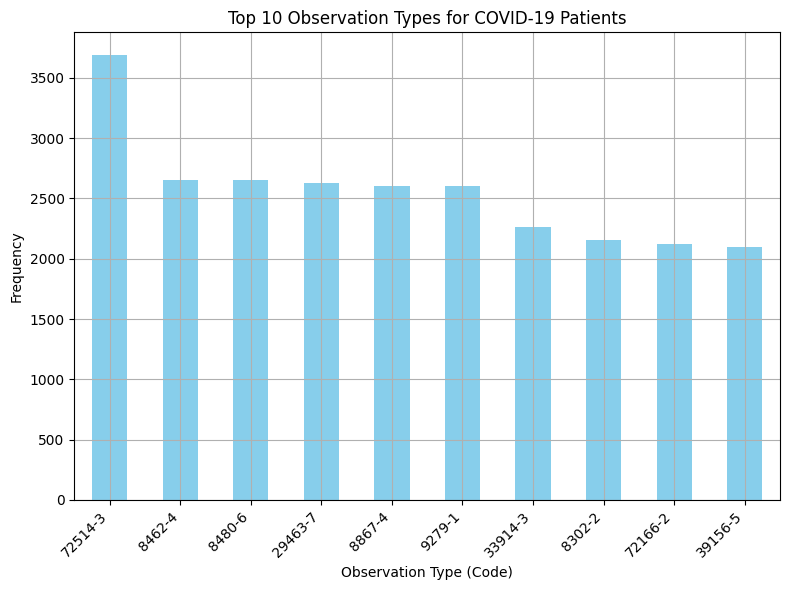

In [ ]:
observation_types = covid_observations['code'].value_counts().head(10)
print("Top 10 Observation Types:\n", observation_types)

plt.figure(figsize=(8, 6))
observation_types.plot(kind='bar', color='skyblue')
plt.title('Top 10 Observation Types for COVID-19 Patients')
plt.xlabel('Observation Type (Code)')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

📈 4.2. Observation Trends Over Time (e.g., Body Temperature)

Example: Track average Body Temperature over time

In [ ]:
temp_obs = covid_observations[covid_observations['codeText'].str.contains('temperature', case=False, na=False)]
temp_obs = temp_obs[temp_obs['issuedDate'].dt.year >= 2019]  # Filter from 2019 onwards
temp_obs['issued_month'] = temp_obs['issuedDate'].dt.to_period('M')
temp_obs['value'] = pd.to_numeric(temp_obs['value'], errors='coerce')

avg_temp_by_month = temp_obs.groupby('issued_month')['value'].mean()
print(avg_temp_by_month)


issued_month
2019-01    37.429000
2019-12    37.647000
2020-01    37.203000
2020-02    37.406000
2020-11    39.494944
2020-12    39.623157
2021-01    39.503282
2021-02    39.403722
2021-03    39.417400
2021-12    37.279000
2022-01    37.650000
2022-03    37.713000
2022-11    37.889000
2023-01    37.908000
2023-02    37.253000
2023-11    37.452000
2023-12    37.912000
2024-01    37.382000
2024-02    37.945000
2025-01    37.500500
2025-02    37.400000
Freq: M, Name: value, dtype: float64


📏 3. Value Range Summary (e.g., Blood Oxygen Saturation)

In [ ]:
spo2_obs = covid_observations[covid_observations['codeText'].str.contains('oxygen saturation', case=False, na=False)]
spo2_obs['value'] = pd.to_numeric(spo2_obs['value'], errors='coerce')

spo2_stats = spo2_obs['value'].describe()
print("SpO2 Stats:\n", spo2_stats)


SpO2 Stats:
 count    662.000000
mean      82.980878
std        5.194211
min       75.040000
25%       78.930000
50%       82.560000
75%       86.345000
max       99.926000
Name: value, dtype: float64


## Step 5: Care Plans 📝🩺

We'll analyze what types of care or interventions COVID patients received during their treatment.

In [ ]:
# filtering for covid patients
covid_care_plans = care_plans[care_plans['patientId'].isin(covid_patient_ids)]

In [ ]:
# Convert date columns
covid_care_plans['start'] = pd.to_datetime(covid_care_plans['start'], errors='coerce')
covid_care_plans['end'] = pd.to_datetime(covid_care_plans['end'], errors='coerce')
covid_care_plans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1638 entries, 44 to 16270
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype                    
---  ------            --------------  -----                    
 0   Unnamed: 0        1638 non-null   int64                    
 1   id                1638 non-null   object                   
 2   status            1638 non-null   object                   
 3   patientId         1638 non-null   object                   
 4   start             777 non-null    datetime64[ns, UTC-05:00]
 5   end               455 non-null    datetime64[ns, UTC-05:00]
 6   category          1638 non-null   object                   
 7   code              1638 non-null   int64                    
 8   codeText          1638 non-null   object                   
 9   intent            1638 non-null   object                   
 10  encounter         1638 non-null   object                   
 11  careTeam          1638 non-null   object      

📊 5.1. Most Common Care Plan Codes

Useful to identify the most common interventions — like oxygen therapy, antivirals, telemedicine, etc.

Top 10 Care Plan Types:
 codeText
Infectious disease care plan (record artifact)            487
Lifestyle education regarding hypertension (procedure)    224
Respiratory therapy (procedure)                           122
Care plan (record artifact)                               118
Diabetes self management plan (record artifact)           106
Routine antenatal care (regime/therapy)                    87
Physiotherapy care plan (record artifact)                  58
Fracture care (regime/therapy)                             52
Self-care interventions (procedure)                        49
Musculoskeletal care (regime/therapy)                      43
Name: count, dtype: int64


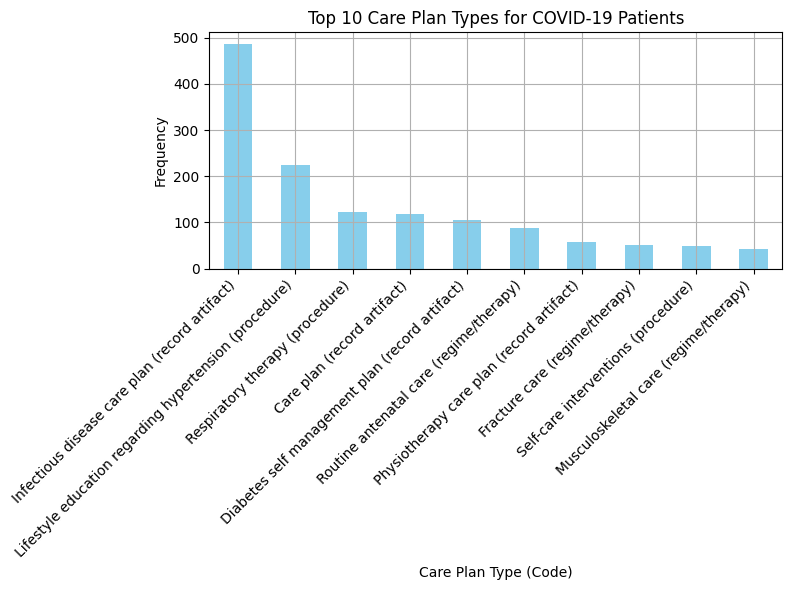

In [ ]:
common_care_codes = covid_care_plans['codeText'].value_counts().head(10)
print("Top 10 Care Plan Types:\n", common_care_codes)

# plotting the values
plt.figure(figsize=(8, 6))
common_care_codes.plot(kind='bar', color='skyblue')

plt.title('Top 10 Care Plan Types for COVID-19 Patients')
plt.xlabel('Care Plan Type (Code)')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.grid(True)
plt.show()

⏱️ 5.2. Average Duration of Care Plans

In [ ]:
covid_care_plans['duration_days'] = (covid_care_plans['end'] - covid_care_plans['start']).dt.days
avg_care_duration = covid_care_plans['duration_days'].mean()

print(f"Average care plan duration: {avg_care_duration:.2f} days")


Average care plan duration: 108.68 days


🧑‍⚕️ 5.3. Care Activity Overview

Top Care Activities:
 activityCodeText
Airborne precautions (procedure)                                 231
Personal protective equipment (physical object)                  128
Isolation of infected patient (procedure)                        103
Deep breathing and coughing exercises (regime/therapy)            61
Recommendation to avoid exercise (procedure)                      61
Exercise therapy (regime/therapy)                                 57
Dietary Approaches to Stop Hypertension diet (regime/therapy)     56
Smoking cessation education (procedure)                           56
Counseling about alcohol consumption (procedure)                  56
Prescribed activity/exercise education (procedure)                56
Name: count, dtype: int64


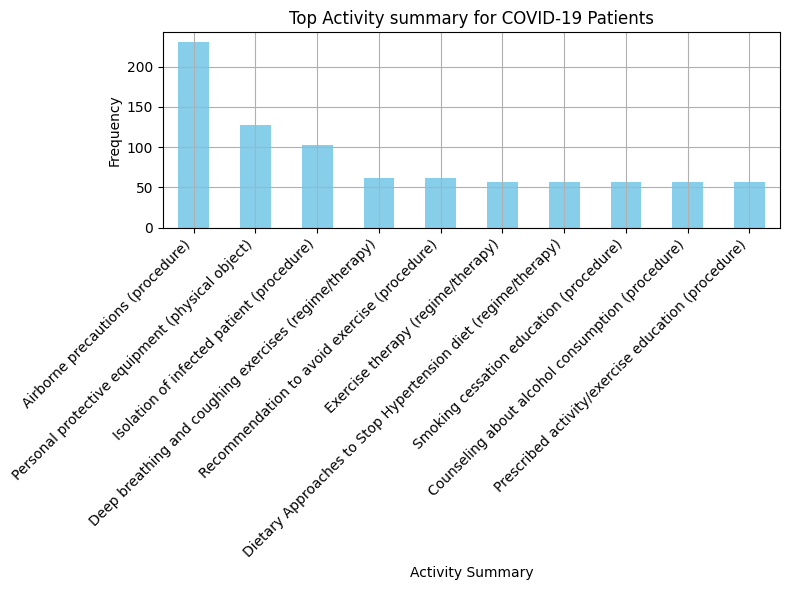

In [ ]:
activity_summary = covid_care_plans['activityCodeText'].value_counts().head(10)
print("Top Care Activities:\n", activity_summary)

plt.figure(figsize=(8, 6))
activity_summary.plot(kind='bar', color='skyblue')

plt.title('Top Activity summary for COVID-19 Patients')
plt.xlabel('Activity Summary')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.grid(True)
plt.show();

## Covid cases by city

In [ ]:
# Aggregate number of COVID cases per city
cases_by_city = patients[patients['id'].isin(covid_patient_ids)].groupby('city').agg(
    covid_case_count=('id', 'count')).reset_index()

# Save to CSV
cases_by_city.to_csv('covid_cases_by_city.csv', index=False)


Demographics Summary (Gender, Age, Marital Status)

In [ ]:
# Calculate age
patients['birthDate'] = pd.to_datetime(patients['birthDate'], errors='coerce')
patients['age'] = datetime.now().year - patients['birthDate'].dt.year
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777 entries, 0 to 1776
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1777 non-null   int64         
 1   id                1777 non-null   object        
 2   gender            1777 non-null   object        
 3   birthDate         1777 non-null   datetime64[ns]
 4   maritalStatus     1777 non-null   object        
 5   city              1777 non-null   object        
 6   state             1777 non-null   object        
 7   postalCode        1777 non-null   int64         
 8   country           1777 non-null   object        
 9   deceased          1777 non-null   bool          
 10  deceasedDateTime  302 non-null    object        
 11  age               1777 non-null   int32         
dtypes: bool(1), datetime64[ns](1), int32(1), int64(2), object(7)
memory usage: 147.6+ KB


In [ ]:
covid_patients = patients[patients['id'].isin(covid_patient_ids)]

# Gender distribution
gender_dist = covid_patients['gender'].value_counts().reset_index()
gender_dist.columns = ['gender', 'count']
gender_dist.to_csv('covid_gender_distribution.csv', index=False)

# Age groups
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76+']
covid_patients['age_group'] = pd.cut(covid_patients['age'], bins=bins, labels=labels, right=False)
age_dist = covid_patients['age_group'].value_counts().sort_index().reset_index()
age_dist.columns = ['age_group', 'count']
age_dist.to_csv('covid_age_distribution.csv', index=False)

# Marital status
marital_dist = covid_patients['maritalStatus'].value_counts().reset_index()
marital_dist.columns = ['marital_status', 'count']
marital_dist.to_csv('covid_marital_status_distribution.csv', index=False)


COVID Case Trend Over Time (by Encounter)

In [ ]:
# Filter encounters for COVID patients
covid_encounters = encounters[encounters['patientId'].isin(covid_patient_ids)]

In [ ]:
covid_encounters['start'] = pd.to_datetime(covid_encounters['start'], errors='coerce')
covid_encounters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9180 entries, 242 to 141507
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype                    
---  ------           --------------  -----                    
 0   Unnamed: 0       9180 non-null   int64                    
 1   id               9180 non-null   object                   
 2   status           9180 non-null   object                   
 3   code             9180 non-null   int64                    
 4   codeText         9180 non-null   object                   
 5   start            3360 non-null   datetime64[ns, UTC-05:00]
 6   end              9180 non-null   object                   
 7   patientId        9180 non-null   object                   
 8   location         9180 non-null   object                   
 9   serviceProvider  9180 non-null   object                   
 10  encounterClass   9180 non-null   object                   
dtypes: datetime64[ns, UTC-05:00](1), int64(2), object(8)
memo

In [ ]:
# Group by date
daily_trend = covid_encounters.groupby(covid_encounters['start'].dt.date).agg(
    daily_cases=('id', 'count')
).reset_index().rename(columns={'start': 'date'})

# Save
daily_trend.to_csv('covid_case_trend.csv', index=False)


# Conclusion

Data Aggregation has been performed and the various results displayed.